# Task 3: To Explore Supervised Machine Learning

## Problem: From the iris dataset, Predict the optimum number of clusters and represent it visually.

In [3]:
#importing importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
#reading the iris data

iris = pd.read_csv('/Users/ankur/Downloads/iris.csv')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
#dropping the id column as it is not neccessary

iris.drop('Id', axis = 1, inplace = True)

In [8]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
type(iris)

pandas.core.frame.DataFrame

In [13]:
iris.shape

(150, 5)

## Calculating the optimum number of clusters

In [14]:
#importing the k-means 
from sklearn.cluster import KMeans

In [16]:
# finding the optimum number of clusters for the k-means classfication

x = iris.iloc[:,[0,1,2,3]].values
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

## Plotting the result onto a line graph 

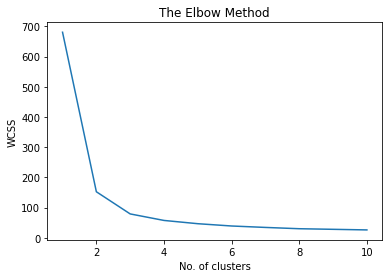

In [37]:
# allowing us to observe the elbow

plt.plot(range(1,11),wcss )
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')   #WCSS - Within Clusters sum of squares
plt.show()

#### from the above graph, we can clearly see that the number of optimum clusters by The Elbow Method i.e. k=3 



In [24]:
#creating the k-means classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

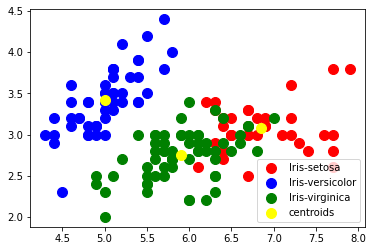

In [35]:
#visualising the cluster on first two columns
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0, 1], s = 100 , c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1, 1], s = 100 , c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2, 1], s = 100 , c = 'green', label = 'Iris-virginica')

# Putting the centroids of the clusters 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100 , c = 'yellow', label = 'centroids')

plt.legend()